In [171]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from __future__ import division

%matplotlib inline 

class Layer(object):
    def __init__(self, inputs, in_size, out_size, activation_function=None):
        self.W = theano.shared(np.random.normal(0,1,(in_size, out_size)))
        self.b = theano.shared(np.zeros(out_size,) + 0.1)
        self.wx_plus_b = T.dot(inputs, self.W) + self.b
        self.activation_function = activation_function
        if activation_function == None:
            self.outputs = self.wx_plus_b
        else:
            self.outputs = self.activation_function(self.wx_plus_b)

def minmax_normalization(data):
    xs_max = np.max(data, axis=0)
    xs_min = np.min(data, axis=0)
    xs = (data - xs_min) / (xs_max - xs_min)
    return xs

#Data
np.random.seed(100)
x_data = load_boston().data
x_data = minmax_normalization(x_data)
y_data = load_boston().target[:, np.newaxis]

#cross validation, tarain test data
x_train, y_train = x_data[:400], y_data[:400]
x_test, y_test = x_data[400:], y_data[400:]

In [172]:
#define
x, y = T.dmatrices('x', 'y')

l1 = Layer(x, 13, 50, T.tanh)
l2 = Layer(l1.outputs, 50, 1, None)

#l2 ragulization/ penalize
cost = T.mean(T.square(l2.outputs - y)) + 0.1 * ((l1.W ** 2).sum() + (l2.W ** 2).sum()) 
# cost = T.mean(T.square(l2.outputs - y)) + 0.1 * (abs(l1.W).sum() + abs(l2.W).sum())  # with l1 regularization


#gradients
gW1, gb1, gW2, gb2 = T.grad(cost, [l1.W, l1.b, l2.W, l2.b])

#gradients descent
learning_rate = 0.01

train = theano.function(
    inputs=[x, y],
    updates=[(l1.W, l1.W - learning_rate * gW1),
             (l1.b, l1.b - learning_rate * gb1),
             (l2.W, l2.W - learning_rate * gW2),
             (l2.b, l2.b - learning_rate * gb2)])

compute_loss = theano.function(inputs=[x, y], outputs=cost)

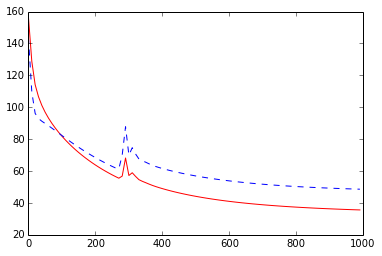

In [177]:
# record cost
train_err_list = []
test_err_list = []
learning_time = []
for i in range(1000):
    train(x_train, y_train)
    if i % 10 == 0:
        # record cost
        train_err_list.append(compute_cost(x_train, y_train))
        test_err_list.append(compute_cost(x_test, y_test))
        learning_time.append(i)

# plot cost history
plt.plot(learning_time, train_err_list, 'r-')
plt.plot(learning_time, test_err_list, 'b--')
plt.show()